# Basic EDA 
> ดูข้อมูลพื้นฐานแบบ single file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import string
import re


In [99]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [102]:
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [60]:
book_df = pd.read_csv('../dataset/Books.csv')
ratings_df = pd.read_csv('../dataset/Ratings.csv')
user_df = pd.read_csv('../dataset/Users.csv')

C:\Users\surap\AppData\Local\Temp\ipykernel_45452\1962976078.py:1: DtypeWarning: Columns (0: Year-Of-Publication) have mixed types. Specify dtype option on import or set low_memory=False.
  book_df = pd.read_csv('../dataset/Books.csv')


## Books

In [61]:
book_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  str   
 1   Book-Title           271360 non-null  str   
 2   Book-Author          271358 non-null  str   
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  str   
 5   Image-URL-S          271360 non-null  str   
 6   Image-URL-M          271360 non-null  str   
 7   Image-URL-L          271357 non-null  str   
dtypes: object(1), str(7)
memory usage: 16.6+ MB


In [62]:
for c in book_df.columns:
    print(c,'\n:[Duplicated]',book_df[c].duplicated().sum(),'\n:[Unique]',book_df[c].nunique())

ISBN 
:[Duplicated] 0 
:[Unique] 271360
Book-Title 
:[Duplicated] 29225 
:[Unique] 242135
Book-Author 
:[Duplicated] 169337 
:[Unique] 102022
Year-Of-Publication 
:[Duplicated] 271158 
:[Unique] 202
Publisher 
:[Duplicated] 254552 
:[Unique] 16807
Image-URL-S 
:[Duplicated] 316 
:[Unique] 271044
Image-URL-M 
:[Duplicated] 316 
:[Unique] 271044
Image-URL-L 
:[Duplicated] 318 
:[Unique] 271041


ISBN เป็น UID<br>
Book-Title มีชื่อซ้ำ อาจจะมีปัญหาตอนทำข้อมูล Books<br>
ํYear มีความผิดปกติ ควร Auto เป็น Int แต่นี้เป็น Object แปลว่าอาจมีข้อความ<br>
URL จะถูกนำออกตอนทำข้อมูล Books

In [63]:
book_df['Year-Of-Publication'].unique() # Anomaly: DK Publishing Inc, Gallimard

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [64]:
book_df.loc[book_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [65]:
book_df.loc[book_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


Book Author กับ Year of Publication สลับกัน

In [66]:
book_df.loc[book_df.ISBN == '078946697X','Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'
book_df.loc[book_df.ISBN == '078946697X','Image-URL-M'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
book_df.loc[book_df.ISBN == '078946697X','Image-URL-S'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
book_df.loc[book_df.ISBN == '078946697X','Publisher'] = 'DK Publishing Inc'
book_df.loc[book_df.ISBN == '078946697X','Year-Of-Publication'] = '2000'
book_df.loc[book_df.ISBN == '078946697X','Book-Author'] = 'Michael Teitelbaum'
book_df.loc[book_df.ISBN == '078946697X','Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [67]:
book_df.loc[book_df.ISBN == '0789466953','Image-URL-L'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'
book_df.loc[book_df.ISBN == '0789466953','Image-URL-M'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
book_df.loc[book_df.ISBN == '0789466953','Image-URL-S'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
book_df.loc[book_df.ISBN == '0789466953','Publisher'] = 'DK Publishing Inc'
book_df.loc[book_df.ISBN == '0789466953','Year-Of-Publication'] = '2000'
book_df.loc[book_df.ISBN == '0789466953','Book-Author'] = 'James Buckley'
book_df.loc[book_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [68]:
book_df.loc[book_df.ISBN == '2070426769','Image-URL-L'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'
book_df.loc[book_df.ISBN == '2070426769','Image-URL-M'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
book_df.loc[book_df.ISBN == '2070426769','Image-URL-S'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
book_df.loc[book_df.ISBN == '2070426769','Publisher'] = 'Gallimard'
book_df.loc[book_df.ISBN == '2070426769','Year-Of-Publication'] = '2003'
book_df.loc[book_df.ISBN == '2070426769','Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
book_df.loc[book_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [69]:
book_df.loc[(book_df.ISBN == '2070426769') | (book_df.ISBN == '078946697X') | (book_df.ISBN == '0789466953'),: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


Split book_df TO books, books_data

In [70]:
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='str')

In [71]:
books_data = book_df[['ISBN', 'Book-Title','Image-URL-S', 'Image-URL-M', 'Image-URL-L']]
books = book_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [72]:
books.info()

<class 'pandas.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  str   
 1   Book-Title           271360 non-null  str   
 2   Book-Author          271358 non-null  str   
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  str   
dtypes: object(1), str(4)
memory usage: 10.4+ MB


In [73]:
# make year to numerical
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

In [74]:
G = books['Year-Of-Publication'].unique().tolist()
G.sort()
print(G)

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


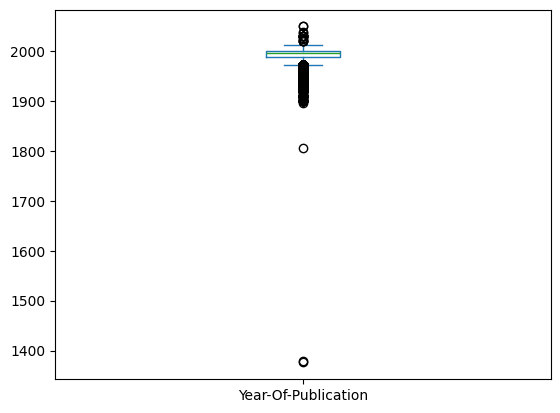

In [75]:
books[books['Year-Of-Publication']>0]['Year-Of-Publication'].plot(kind='box')
plt.show()

In [76]:
books[(books['Year-Of-Publication']==2024)&(books['Year-Of-Publication']>0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
246842,0380000059,CLOUT,D. GIBBONS,2024,Avon


In [77]:
books.loc[(books['Year-Of-Publication'] > 2004) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.nan

In [78]:
G = books['Year-Of-Publication'].unique().tolist()
G.sort()
print(G)

[1920.0, 1941.0, 1942.0, 1951.0, 1952.0, 1953.0, 1956.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1965.0, 1966.0, 1968.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, nan, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1954.0, 1955.0, 1957.0, 1963.0, 1964.0, 1967.0, 1969.0]


In [79]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [80]:
books.loc[(books['Book-Title'] == 'Tyrant Moon'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN


In [81]:
books.loc[(books['Book-Title'] == 'Finders Keepers'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002.0,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989.0,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993.0,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998.0,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN
134309,0156309505,Finders Keepers,Will,1989.0,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002.0,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003.0,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993.0,Worldwide Library


In [82]:
books.loc[(books['Book-Author'] == 'Elaine Corvidae') | (books['Book-Author'] == 'Linnea Sinclair'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001.0,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001.0,Hard Shell Word Factory
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [83]:
books.loc[(books['ISBN'] == '193169656X'),'Publisher'] = 'Unknown'
books.loc[(books['ISBN'] == '1931696993'),'Publisher'] = 'Unknown'

In [84]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999.0,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [85]:
books.loc[(books['ISBN'] == '9627982032'),'Book-Author'] = 'Unknown'

# Users

In [86]:
user_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  str    
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), str(1)
memory usage: 6.4 MB


In [88]:
user_df.loc[(user_df['Age'] > 90) | (user_df['Age'] < 4), 'Age'] = np.nan

In [89]:
user_df['Age'] = user_df['Age'].fillna(user_df['Age'].mean())
user_df['Age'] = user_df['Age'].astype(np.int64)

# Ratings

In [90]:
ratings_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   User-ID      1149780 non-null  int64
 1   ISBN         1149780 non-null  str  
 2   Book-Rating  1149780 non-null  int64
dtypes: int64(2), str(1)
memory usage: 26.3 MB


In [91]:
ratings_df['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [92]:
n_users = user_df.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75670906880


In [93]:
ratings_new = ratings_df[ratings_df['ISBN'].isin(books['ISBN'])]
ratings_new

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [94]:
ratings_new = ratings_new[ratings_new['User-ID'].isin(user_df['User-ID'])]
ratings_new

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [95]:
sparsity = 1 - (len(ratings_new)/(n_users*n_books))
print("No. of users = " + str(n_users) + ", No. of Books = " + str(n_books) + "\nThe Following Dataset has " + str(sparsity*100) + " % Sparsity")


No. of users = 278858, No. of Books = 271360
The Following Dataset has 99.99863734155898 % Sparsity


In [97]:
rating_explicit = ratings_new.loc[ratings_new['Book-Rating'] != 0, :]
rating_implicit = ratings_new.loc[ratings_new['Book-Rating'] == 0, :]
print("Explicit Ratings data shape = " + str(rating_explicit.shape) + "\nImplicit Ratings data shape = " + str(rating_implicit.shape))

Explicit Ratings data shape = (383842, 3)
Implicit Ratings data shape = (647294, 3)


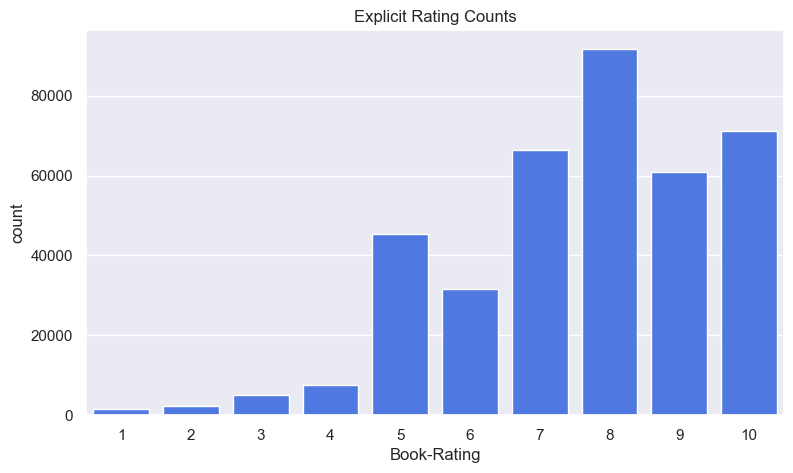

In [103]:
plt.figure(figsize=(9, 5))
plt.title('Explicit Rating Counts')
sns.countplot(x = 'Book-Rating', data = rating_explicit);

## Clean Title Text

In [104]:
def clean_text(text):
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',text) 
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    
    #remove newline char
    text = re.sub('\n', '', text)
    
    return text

In [105]:
books['Book-Title'] = books['Book-Title'].apply(lambda x:clean_text(x))

In [106]:
merged_data = pd.merge(books, ratings_new, on='ISBN')
merged_data =  merged_data.sort_values('ISBN', ascending=True)
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins,209516,0
542150,0001046438,Liar,Stephen Fry,NaN,Harpercollins Uk,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers,196149,0


# Top 30 most read books

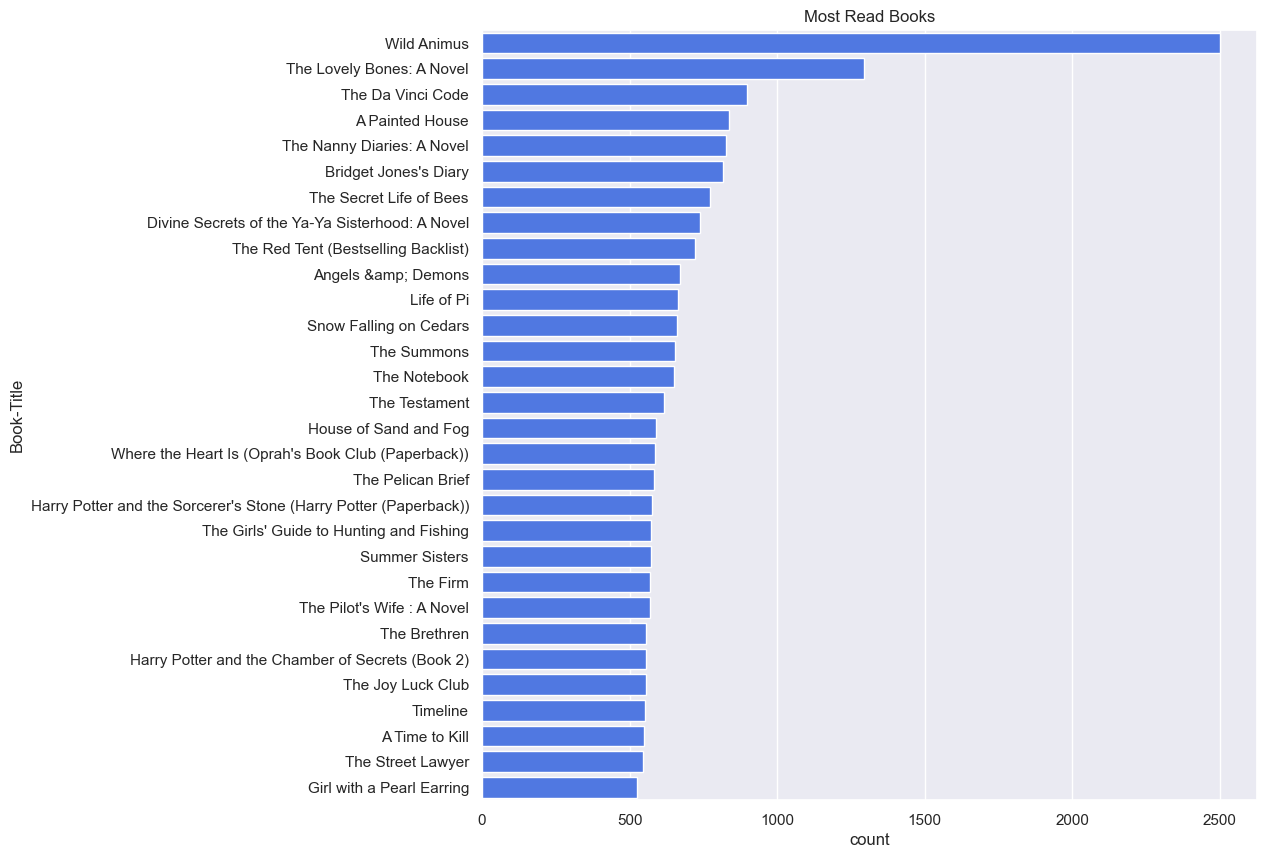

In [107]:
most_read = merged_data['Book-Title'].value_counts().reset_index()
most_read.columns = ['Book-Title','count']

plt.figure(figsize = (10,10))
plt.title("Most Read Books")
sns.barplot(x = 'count', y = 'Book-Title', data = most_read.head(30));

In [109]:
merged_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'User-ID', 'Book-Rating'],
      dtype='str')

In [111]:
top_rated = merged_data[['Book-Title','Book-Rating']]
top_rated = top_rated.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
top_rated = top_rated.sort_values('Book-Rating',ascending=False).reset_index()
top_rated = top_rated[['Book-Title','Book-Rating']]

top_rated.head()

,Book-Title,Book-Rating
0,Timelock: How Life Got So Hectic and What You ...,10.0
1,Timelines of World History,10.0
2,Bathroom Game Book,10.0
3,"Rookie Princess (Silhouette Desire, No 483)",10.0
4,Roof World,10.0


In [112]:
top_rated.tail()

,Book-Title,Book-Rating
241066,name the baby.,0.0
241067,namedropping.,0.0
241068,net future,0.0
241069,'Twas the Night Before Christmas,0.0
241070,Harry Potter and the Bible: The Menace Behind...,0.0


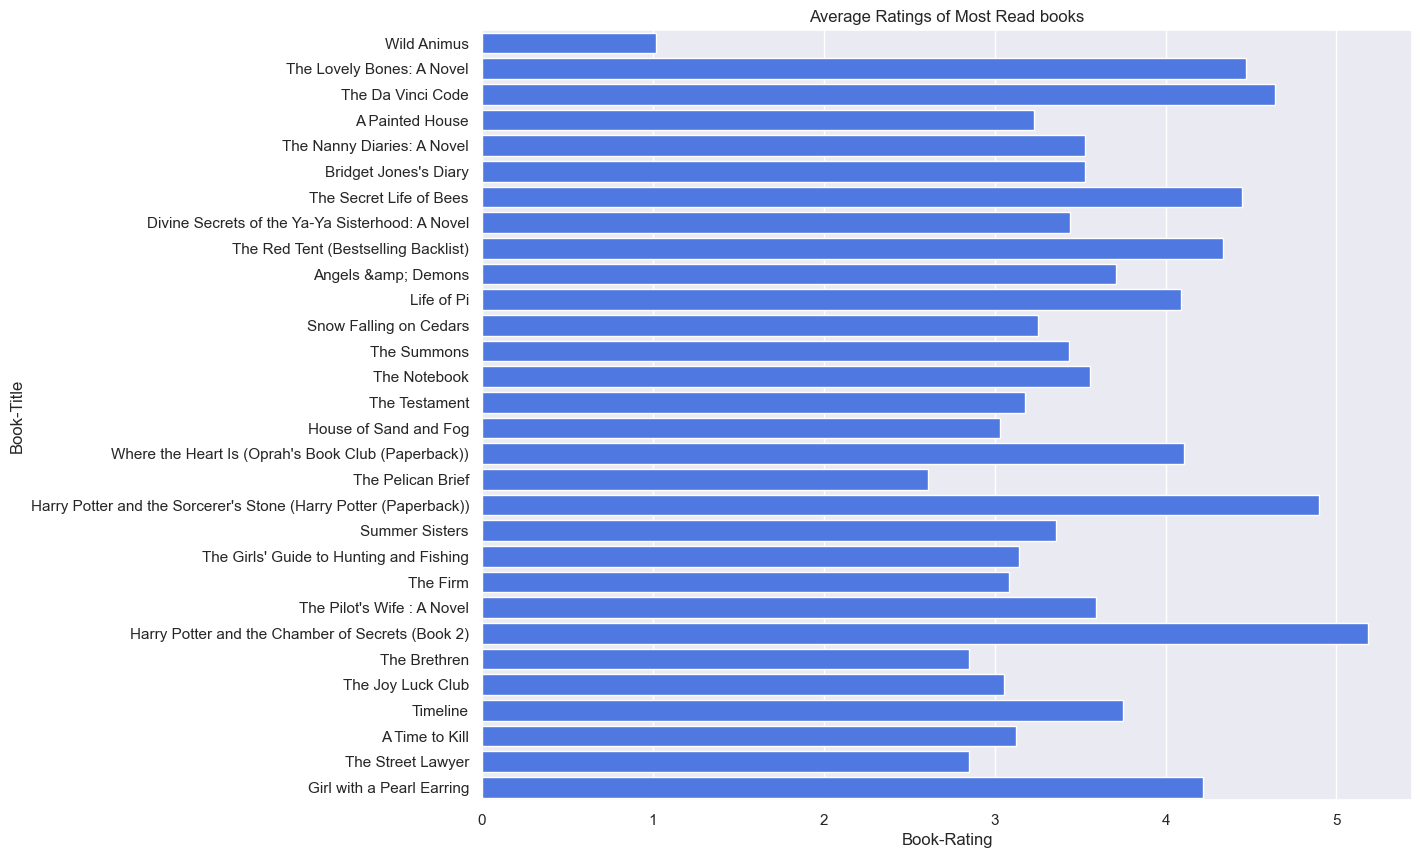

In [114]:
avg_data = merged_data.groupby('Book-Title', as_index=False)['Book-Rating'].mean()
temp = merged_data['Book-Title'].value_counts().reset_index()
temp.columns = ['Book-Title','count']
most_rated_by_reads = pd.merge(avg_data,temp,on='Book-Title')

most_rated_by_reads = most_rated_by_reads.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title("Average Ratings of Most Read books")
sns.barplot(x = 'Book-Rating', y = 'Book-Title', data = most_rated_by_reads.head(30));

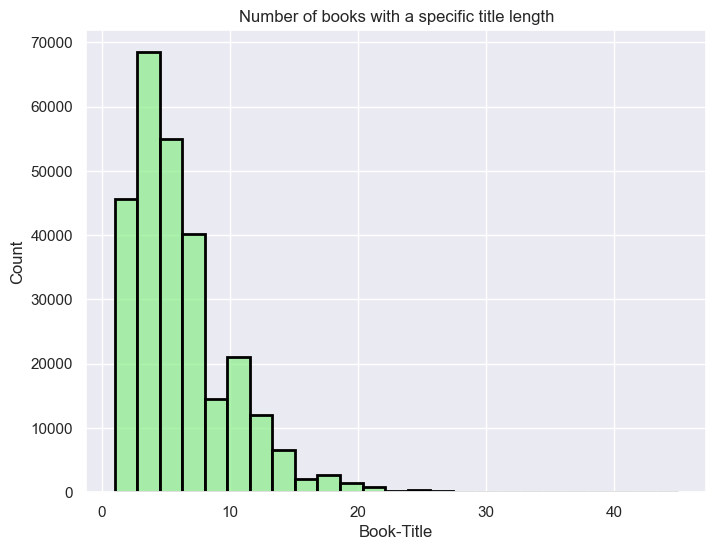

In [115]:
title_length = books['Book-Title'].str.split().map(lambda x: len(x))
plt.figure(figsize=(8,6))
plt.title('Number of books with a specific title length')
sns.histplot(title_length, bins=25, color = 'lightgreen', linewidth = 2, edgecolor = 'black');

In [116]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='str')

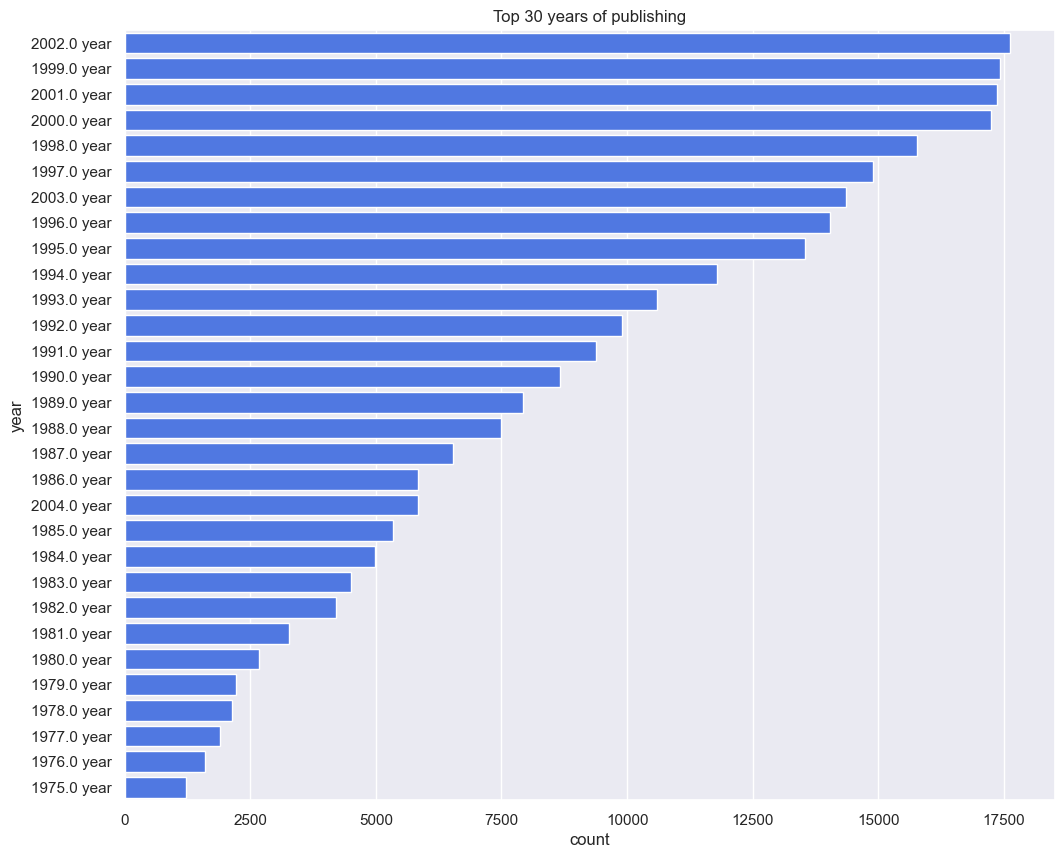

In [117]:
yearOP = books['Year-Of-Publication'].value_counts().reset_index()

yearOP.columns = ['value', 'count']

yearOP['year'] = yearOP['value'].astype(str) + ' year'

yearOP = yearOP.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 years of publishing')
sns.barplot(data = yearOP.head(30), x='count', y="year");

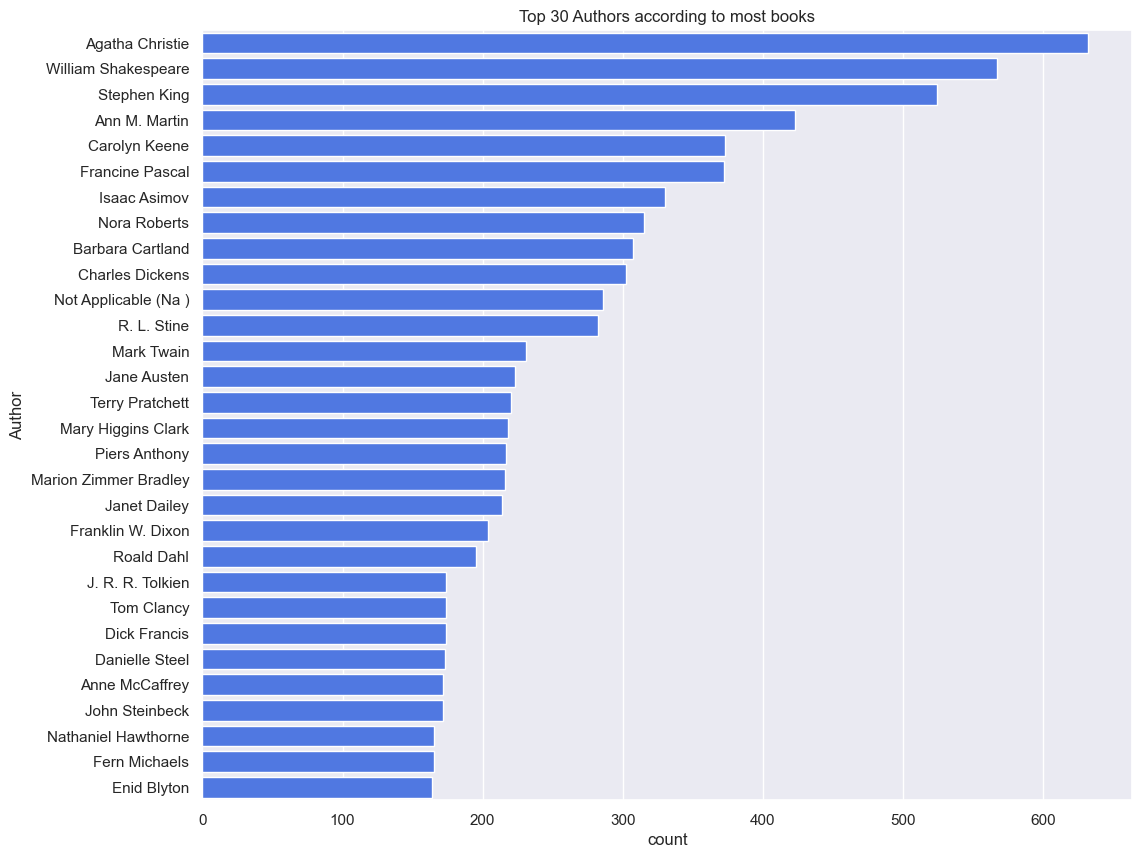

In [118]:
top_author = books['Book-Author'].value_counts().reset_index()
top_author.columns = ['Author', 'count']
top_author['Author'] = top_author['Author']
top_author = top_author.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Authors according to most books')
sns.barplot(data = top_author.head(30), x = 'count', y = 'Author');

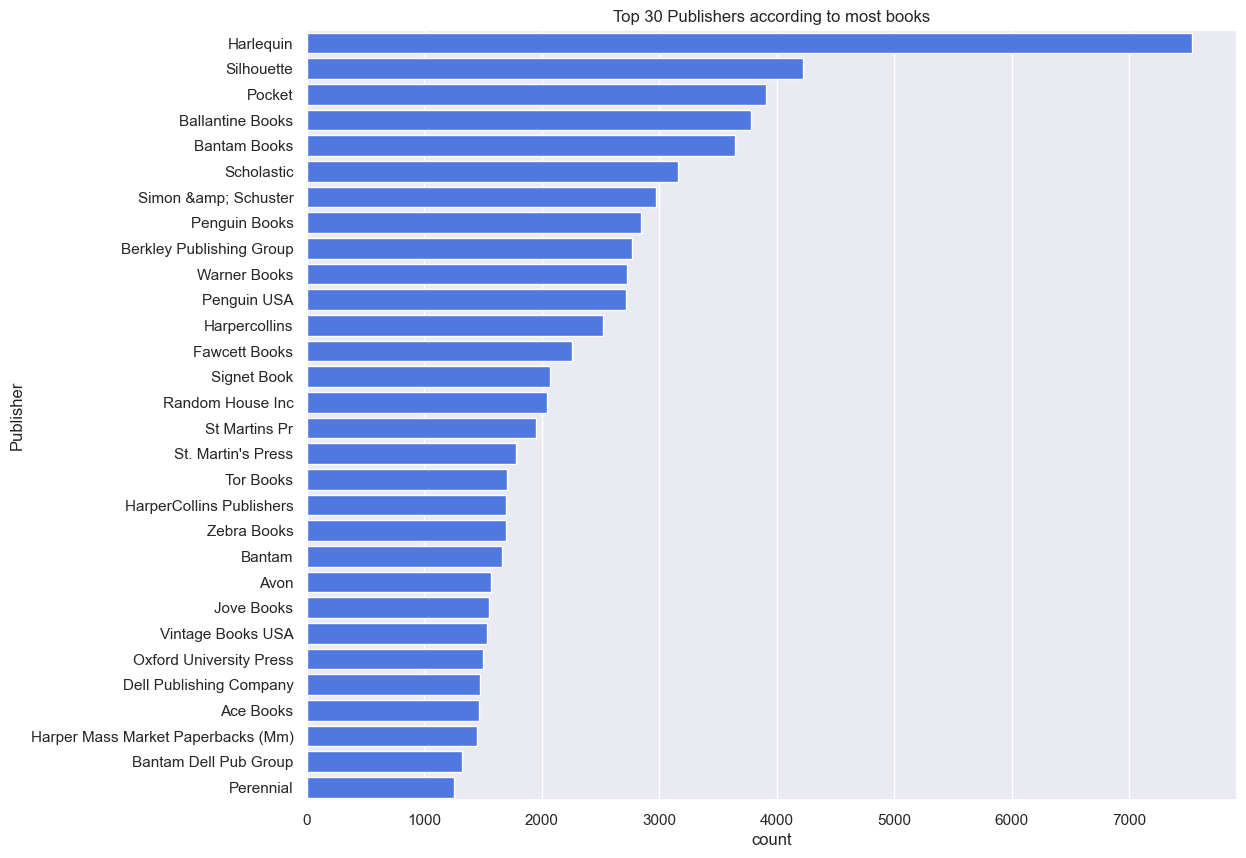

In [119]:
# Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
#        'Publisher'],
#       dtype='str')

top_publisher = books['Publisher'].value_counts().reset_index()
top_publisher.columns = ['Publisher', 'count']
top_publisher['Publisher'] = top_publisher['Publisher']
top_publisher = top_publisher.sort_values('count',ascending=False)

plt.figure(figsize=(12,10))
plt.title('Top 30 Publishers according to most books')
sns.barplot(data = top_publisher.head(30), x = 'count', y = 'Publisher');

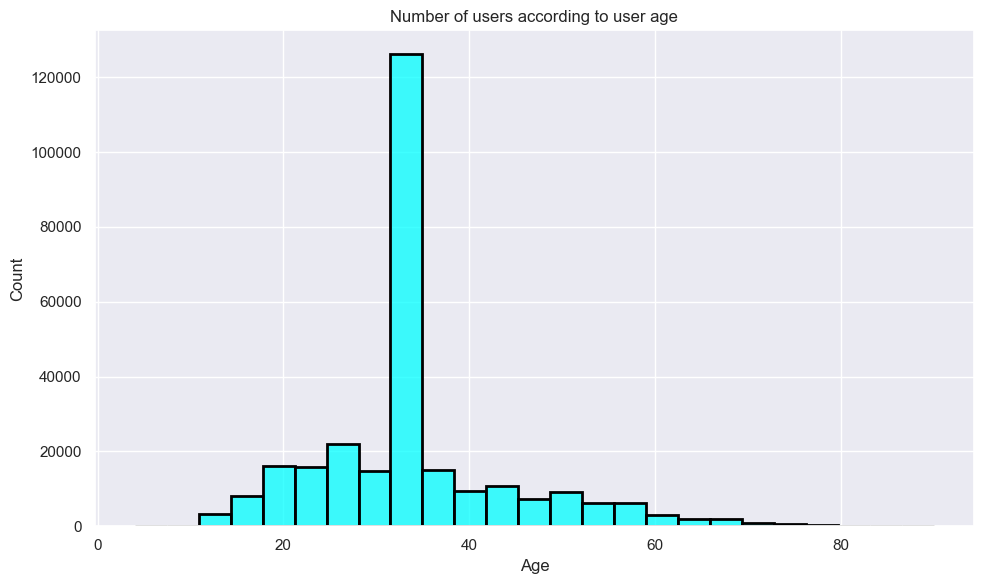

In [120]:
user_age = user_df['Age']
plt.figure(figsize=(10,6), tight_layout=True)
plt.title('Number of users according to user age')
sns.histplot(user_age, bins=25, linewidth = 2, color = 'cyan', edgecolor = 'black');

In [127]:
author_string = " ".join(books['Book-Author'].fillna('').astype(str))
title_string = " ".join(books['Book-Title'].astype(str))
publisher_string = " ".join(books['Publisher'].astype(str))
stop_words = set(STOPWORDS)

def wordcloud(string,title ="unknown"):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21,
                   stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.title(title)
    plt.axis('off')
    plt.imshow(wc)

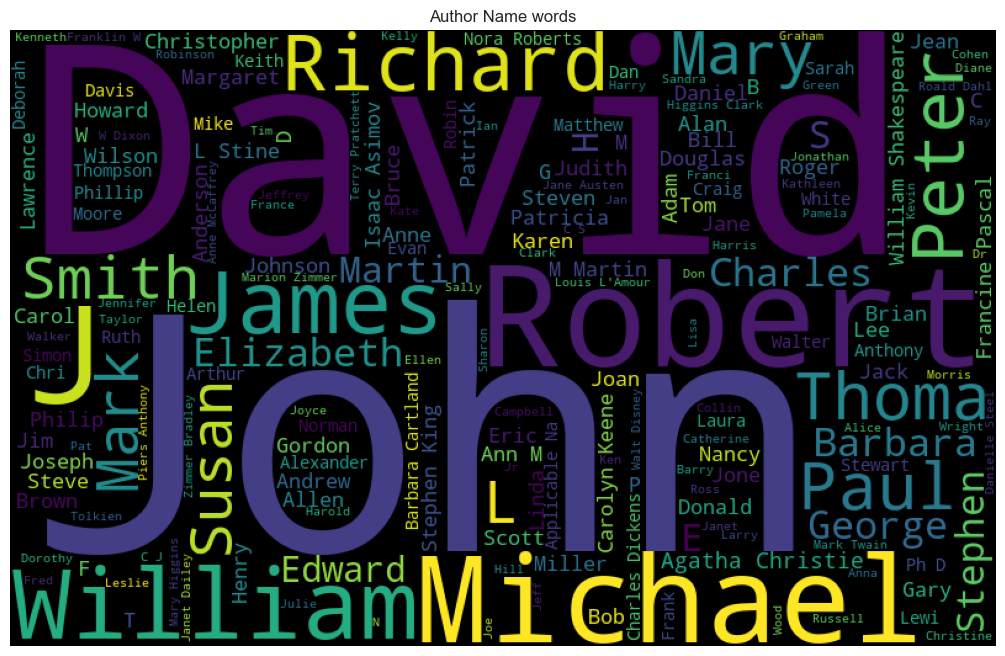

In [128]:
wordcloud(author_string,'Author Name words')

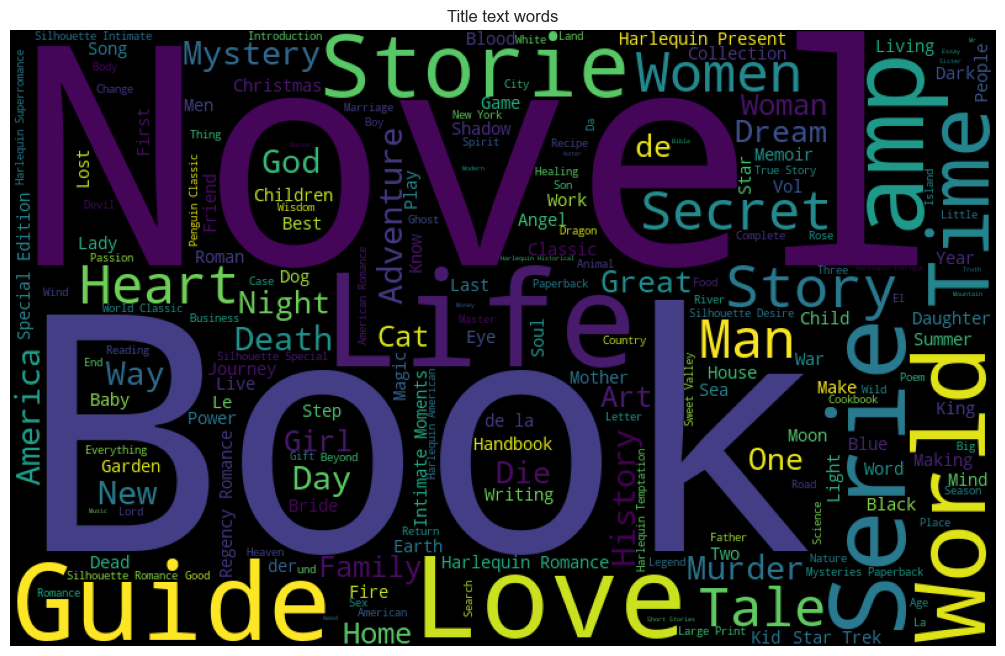

In [129]:
wordcloud(title_string,'Title text words')

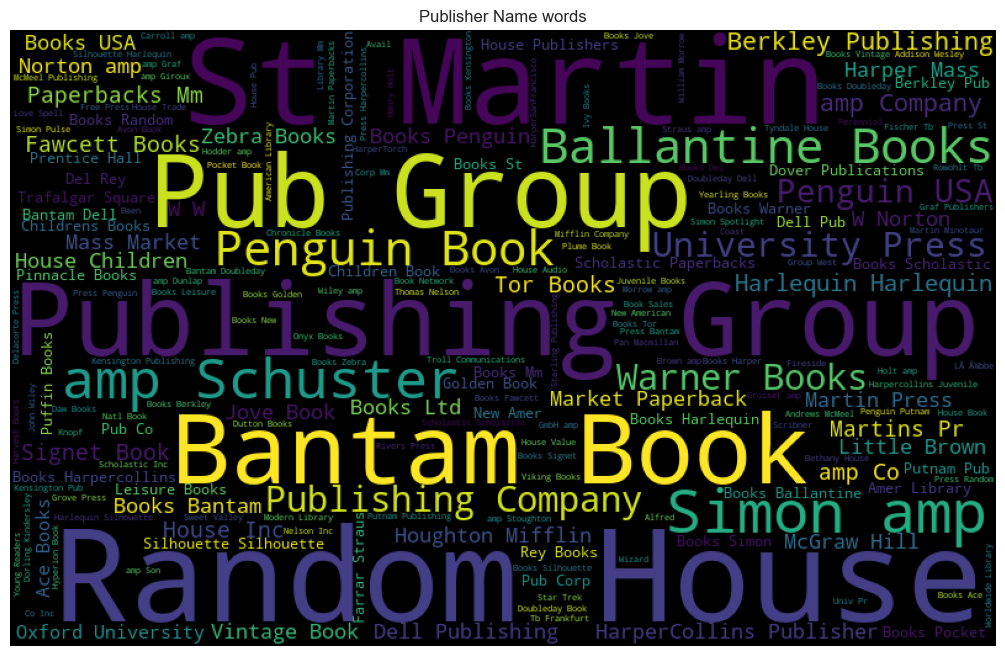

In [130]:
wordcloud(publisher_string,'Publisher Name words')

## Popularity Based Recommendation

In [132]:
# rating_explicit.columns

In [133]:
ratings_count = pd.DataFrame(rating_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top_10 = ratings_count.sort_values('Book-Rating', ascending = False).head(10)
print("Following books are recommended")
top_10.merge(books, left_index = True, right_on = 'ISBN').reset_index()

Following books are recommended


,index,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,748,4108,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
2,522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
3,2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books
4,356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books
5,26,2551,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
6,1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
7,706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books
8,231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books
9,118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star


## Data Preprocessing

Users with less than 100 ratings, and books with less than 100 ratings are excluded

In [134]:
ratings_new.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='str')

In [135]:
counts1 = ratings_new['User-ID'].value_counts()
ratings_data = ratings_new[ratings_new['User-ID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_data['Book-Rating'].value_counts()
ratings_data = ratings_data[ratings_data['Book-Rating'].isin(counts[counts >= 100].index)]

In [137]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='str')

In [138]:
merged_new = pd.merge(ratings_data,books,on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author']
merged_new = merged_new.drop(columns, axis=1)

In [139]:
number_rating = merged_new.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns={'Book-Rating':'number of rating'},inplace=True)
number_rating.head()

,Book-Title,number of rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [140]:
final_ratings = merged_new.merge(number_rating,on='Book-Title') 
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,number of rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,101
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,7
2,277427,003008685X,8,Pioneers,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),17


In [141]:
final_ratings = final_ratings[final_ratings['number of rating']>=30]

In [142]:
print("Shape Before :" + str(final_ratings.shape))
final_ratings.drop_duplicates(['User-ID','Book-Title'],inplace=True)
print("Shape After  :" + str(final_ratings.shape))

Shape Before :(145111, 5)
Shape After  :(142011, 5)


In [143]:
book_pivot = final_ratings.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')
book_pivot.shape

(2324, 1652)

In [144]:
book_pivot.fillna(0,inplace=True)
book_pivot

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong to Me and Other True Cases (Ann Rule's Crime Files: Vol. 2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zlata's Diary: A Child's Life in Sarajevo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning Modelling

In [145]:
book_sparse=csr_matrix(book_pivot)
model=NearestNeighbors(metric='cosine',algorithm='brute')
model.fit(book_sparse)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"radius radius: float, default=1.0Range of parameter space to use by default for :meth:`radius_neighbors`queries.",1.0
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'brute'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'cosine'
,"p p: float (positive), default=2Parameter for the Minkowski metric fromsklearn.metrics.pairwise.pairwise_distances. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [146]:
def recommend(book_name):
    book_id = np.where(book_pivot.index==book_name)[0][0]
    distances,suggestions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors = 11)
    
    
    books=[]
    for i in range(len(suggestions)):
        if i==0:
            print("The suggestions for ",book_name,"are : ")
        if not i:
            books = book_pivot.index[suggestions[i]]
    for i in range(1,len(books)):
         print(str(i) + ": " + books[i] )

recommend('The Sum of All Fears (Jack Ryan Novels)')

The suggestions for  The Sum of All Fears (Jack Ryan Novels) are : 
1: Executive Orders (Jack Ryan Novels)
2: Clear and Present Danger (Jack Ryan Novels)
3: The Road to Omaha
4: Debt of Honor (Jack Ryan Novels)
5: Ruthless.Com (Tom Clancy's Power Plays (Paperback))
6: Without Remorse
7: Critical Mass
8: The Charm School
9: Fault Lines
10: The Postman (Bantam Classics)
